In [ ]:
import numpy as np                   # Data manipulation
import pandas as pd                  # DataFrame manipulation
import time                         
import warnings                      # To suppress warnings
import matplotlib.pyplot as plt     
import seaborn as sns
from sklearn import cluster, mixture # For clustering 
from sklearn.preprocessing import StandardScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')






## ML MODELS AND CLUSTERING USING PLOTS AND COMPARING THEM 

We are performing clustering of Utkal university students data by making models and using Machine learning algorithms and comparison plots. .

List of ML algortithms and using them with Clustering methods 

1. LR
2. LR+Clustering
3. KNN
4. KNN+Clustering 
5. SVM
6. SVM+Clustering
7. RF
8. RF+Clustering





### Define Cluster Class


In [ ]:

# Define CluserMethod class : which returns the clustering result based on Utkal university students as input 

class ClusterMethodList(object) :
    def get_cluster_instance(self, argument,input_data,X):
        method_name = str(argument).lower()+ '_cluster'
        method = getattr(self,method_name,lambda : "Invalid Clustering method")
        return method(input_data,X)
    
    def kmeans_cluster(self,input_data,X):
        km = cluster.KMeans(n_clusters =input_data['n_clusters'] )
        return km.fit_predict(X)
   
    def meanshift_cluster(self,input_data,X):
        ms = cluster.MeanShift(bandwidth=input_data['bandwidth'])
        return  ms.fit_predict(X)
    
    def gaussian_mixture_cluster(self,input_data,X):
        gmm = mixture.GaussianMixture( n_components=input_data['n_clusters'], covariance_type='full')
        gmm.fit(X)
        return  gmm.predict(X)



In [ ]:
# Define Clustering Prcoess

def startClusteringProcess(list_cluster_method,input_data,no_columns,data_set):
    fig,ax = plt.subplots(no_rows,no_columns, figsize=(10,10)) 
    cluster_list = ClusterMethodList()
    i = 0
    j=0
    for cl in list_cluster_method :
        cluster_result = cluster_list.get_cluster_instance(cl,input_data,data_set)
        #convert cluster result array to DataFrame
        data_set[cl] = pd.DataFrame(cluster_result)
        ax[i,j].scatter(data_set.iloc[:, 4], data_set.iloc[:, 5],  c=cluster_result)
        ax[i,j].set_title(" Cluster Result")
        j=j+1
        if( j % no_columns == 0) :
            j= 0
            i=i+1
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()



#### Initialize Input Parameters for Clustering 

In [ ]:
list_cluster_method = ['KMeans',"MeanShift","Gaussian_Mixture"]
 
no_columns = 2
no_rows = 4

n_clusters= 3
bandwidth = 0.1 

eps = 0.3

damping = 0.9
preference = -200
input_data = {'n_clusters' :  n_clusters, 'eps' : eps,'bandwidth' : bandwidth, 'damping' : damping, 'preference' : preference}


#### Plot Graph

In [ ]:
# Start Clustering Process based on 8 models and plotting them 

startClusteringProcess(list_cluster_method,input_data,no_columns,WHR_data)


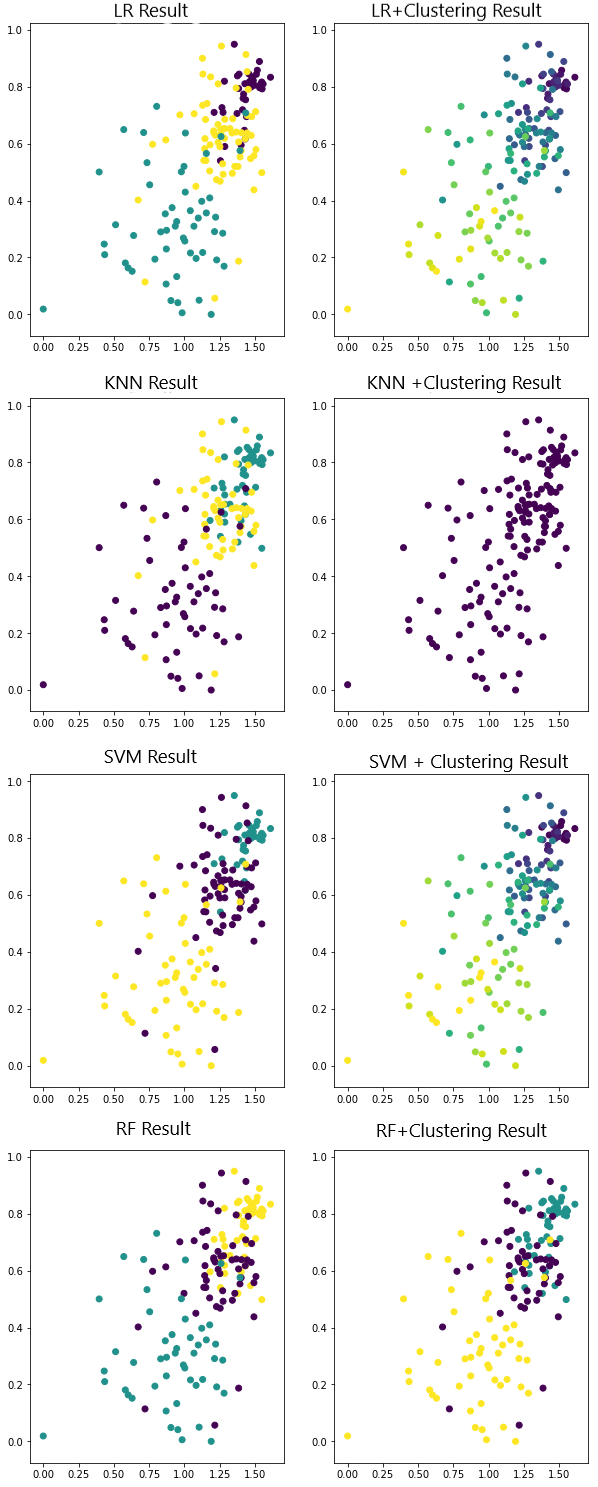